# Airbnb Rio de Janeiro Data Analysis

We will analyse the dataset provided by Airbnb for the city of Rio de Janeiro. Let us import the necessary libraries and load the data

Before starting our analysis, the questions we would like to answer are:
- What is the most popular neighborhood for renting a room?
- What is the most popular room type?
- What is the most expensive room type?
- The most expensive rooms are located in which neighborhood?
- What is the expected average price per neighborhood?

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv('listings.csv')

In [4]:
df.head()

id                                               name  host_id  \
0  17878  Very Nice 2Br in Copacabana w. balcony, fast WiFi    68997   
1  24480                   Nice and cozy near Ipanema Beach    99249   
2  35636                   Cosy flat close to Ipanema beach   153232   
3  35764     COPACABANA SEA BREEZE  -  RIO - 20 X Superhost   153691   
4  41198                  Modern 2bed,Top end of Copacabana   178975   

                  host_name  neighbourhood_group neighbourhood  latitude  \
0                  Matthias                  NaN    Copacabana -22.96592   
1                      Goya                  NaN       Ipanema -22.98570   
2                  Patricia                  NaN       Ipanema -22.98816   
3  Patricia Miranda & Paulo                  NaN    Copacabana -22.98127   
4                     Nicky                  NaN    Copacabana -22.97962   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -43.17896  Entire home/apt    200               5                260   
1  -43.20193  Entire home/apt    307               3                 85   
2  -43.19359  Entire home/apt    275               2                181   
3  -43.19046  Entire home/apt    120               3                356   
4  -43.19230  Entire home/apt    494               3                 18   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2021-02-08               2.00                               1   
1  2018-02-14               0.67                               1   
2  2020-03-15               2.00                               1   
3  2021-03-06               2.79                               1   
4  2016-02-09               0.18                               2   

   availability_365  
0               334  
1                37  
2               236  
3               120  
4               365

Before starting our analysis, we should check the data to verify what kind of adjustments we have to make

In [5]:
# Checking the number of total and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26628 entries, 0 to 26627
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26628 non-null  int64  
 1   name                            26599 non-null  object 
 2   host_id                         26628 non-null  int64  
 3   host_name                       25908 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26628 non-null  object 
 6   latitude                        26628 non-null  float64
 7   longitude                       26628 non-null  float64
 8   room_type                       26628 non-null  object 
 9   price                           26628 non-null  int64  
 10  minimum_nights                  26628 non-null  int64  
 11  number_of_reviews               26628 non-null  int64  
 12  last_review                     

The columns we want to look at (ie. contain useful data to answer our questions) are: neighbourhood, latitude, longitude, room_type, price, number_of_reviews

In [48]:
# Checking for null values in our columns of interest
df[['neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews']].isnull().sum()

neighbourhood        0
latitude             0
longitude            0
room_type            0
price                0
number_of_reviews    0
dtype: int64

There are no null/empty values in the columns we are interested in. One additional piece of information could be useful too: the date of the information

In [7]:
# Converting the date column to datetime type
df['last_review'] = pd.to_datetime(df['last_review'])

In [8]:
# Checking the information age
df['last_review'].sort_values(ascending=False)[:5]

10432   2021-03-24
24404   2021-03-24
18627   2021-03-24
22063   2021-03-24
23345   2021-03-24
Name: last_review, dtype: datetime64[ns]

The latest information the dataset gives us is from March 2021. That said, we could trim our Dataframe to our variables of interest, discarding columns that are not relevant for our analysis

In [49]:
df = df[['neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews']]
df.head()

neighbourhood  latitude  longitude        room_type  price  \
0    Copacabana -22.96592  -43.17896  Entire home/apt    200   
1       Ipanema -22.98570  -43.20193  Entire home/apt    307   
2       Ipanema -22.98816  -43.19359  Entire home/apt    275   
3    Copacabana -22.98127  -43.19046  Entire home/apt    120   
4    Copacabana -22.97962  -43.19230  Entire home/apt    494   

   number_of_reviews  
0                260  
1                 85  
2                181  
3                356  
4                 18

## Answering our questions

Let us set the context and a standard palette for seaborn

In [9]:
sns.set_palette("viridis")
sns.set_context('talk')
sns.set_style('whitegrid')

### What is the most popular neighborhood for renting a room?

The most popular neighborhood is the one with the most renting options. Let us have a look at the value counts

In [10]:
neighborhoods_count = df['neighbourhood'].value_counts().sort_values(ascending=False)
print(neighborhoods_count)

Copacabana         7695
Barra da Tijuca    2710
Ipanema            2581
Jacarepaguá        1350
Botafogo           1204
                   ... 
Vila Kosmos           1
Água Santa            1
Maré                  1
Gericinó              1
Acari                 1
Name: neighbourhood, Length: 151, dtype: int64


Notice there is a total of 151 neighborhoods in Rio de Janeiro and Copacabana has the highest number of available room options. A graph will help us visualize it better

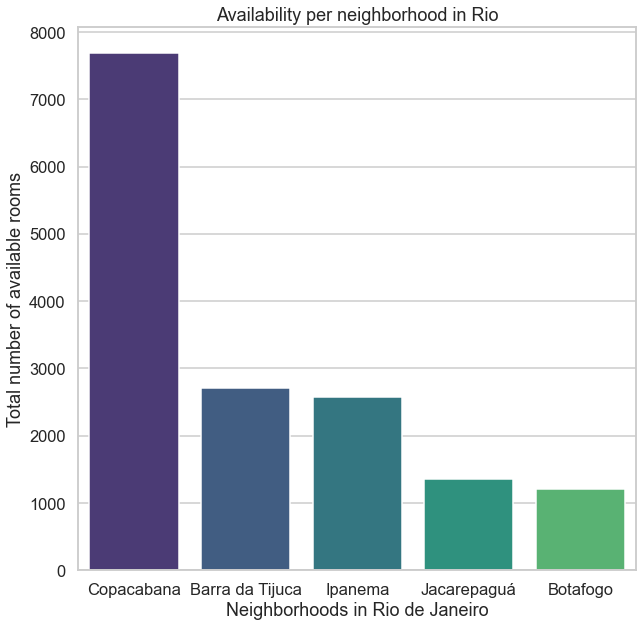

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=neighborhoods_count[0:5].index, y=neighborhoods_count[0:5].values, ax=ax)

# Customizing plot
ax.set_title('Availability per neighborhood in Rio')
ax.set_ylabel('Total number of available rooms')
ax.set_xlabel('Neighborhoods in Rio de Janeiro')
plt.show()

We notice Copacabana is the neighborhood that has the highest number of room options available

In [39]:
def group_columns(df, group_column, interest_column, operations):
    
    ''' 
    Gets and returns the result of the operations performed on the interest_column values grouped by the group_column

    Parameters
    ----------
    df: the Dataframe from which the data will be extracted
    group_column: the column(s) used for grouping the data
    interest_column: the column(s) in which we want to perform the operation(s)
    operations: the method(s) to apply on the interest_column
    
    Returns
    -------
    pandas series
        the operation on the values of the interest_column grouped by the group_column
    '''
    
    return df.groupby(by=group_column)[interest_column].agg(operations) 

In [40]:
neighborhoods_review_count = group_columns(df, 'neighbourhood', 'number_of_reviews', 'sum').sort_values(ascending=False)
print(neighborhoods_review_count)

neighbourhood
Copacabana         128781
Ipanema             51823
Barra da Tijuca     27775
Leblon              19369
Botafogo            13564
                    ...  
Manguinhos              0
Maré                    0
Osvaldo Cruz            0
Paciência               0
Água Santa              0
Name: number_of_reviews, Length: 151, dtype: int64


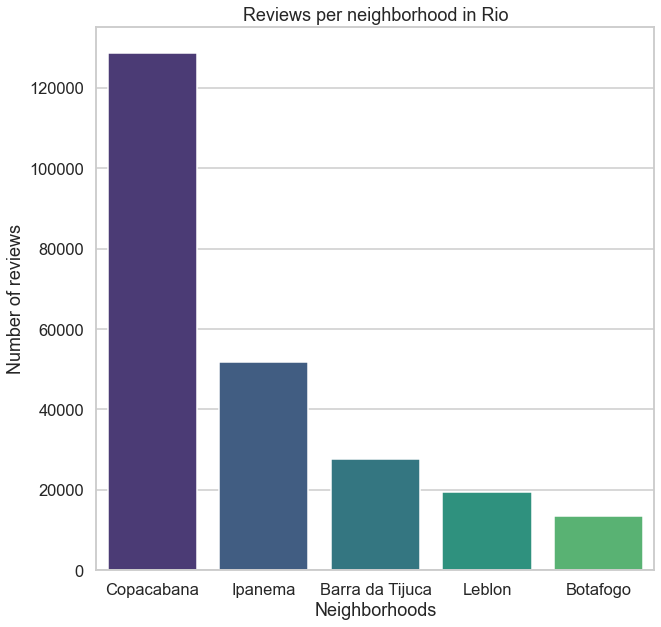

In [127]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=neighborhoods_review_count[:5].index, y=neighborhoods_review_count[:5].values, ax=ax)

# Customizing plot
ax.set_title('Reviews per neighborhood in Rio')
ax.set_ylabel('Number of reviews')
ax.set_xlabel('Neighborhoods')
plt.show()

Copacabana is the most popular neighborhood, followed by Ipanema. While Ipanema has slightly fewer rooms than Barra da Tijuca, it is featured on many national TV productions, making it a popular destination. 

### What is the most the popular room type?

Let us count the total number of rooms to find the most popular type

In [10]:
room_count = df['room_type'].value_counts()
print(room_count)

Entire home/apt    19280
Private room        6632
Shared room          620
Hotel room            96
Name: room_type, dtype: int64


It is quite clear the most popular room type is the *entire home/apt*. It seems Airbnb guests value privacy when looking for a place to rest in a different city 

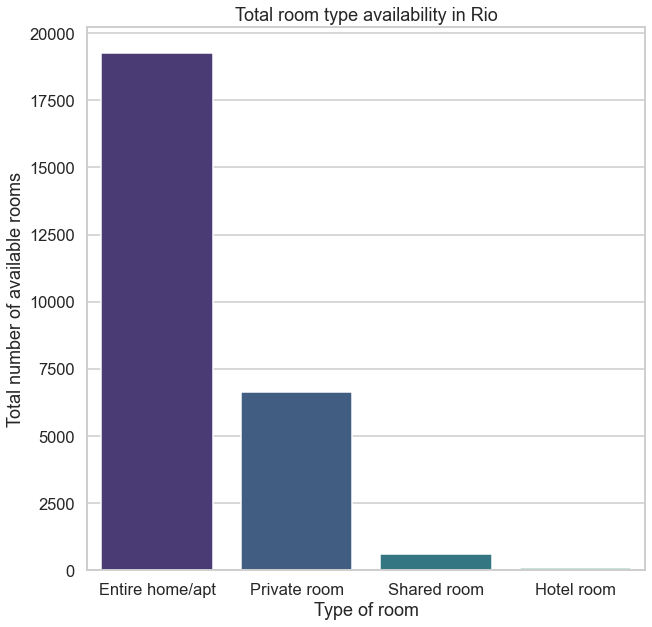

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=room_count.index, y=room_count.values, ax=ax)

# Customizing plot
ax.set_title('Total availability of room types in Rio')
ax.set_ylabel('Total number of available rooms')
ax.set_xlabel('Type of room')
plt.show()

We can look at the total number of reviews per room type to approximate the most popular rooms in Rio. Since the category entire home/apt is the most common type of room available, I would expect them to be the most rented

In [41]:
room_reviews_count = group_columns(df, 'room_type', 'number_of_reviews', 'sum').sort_values(ascending=False)
print(room_reviews_count)

room_type
Entire home/apt    266699
Private room        55130
Hotel room           2146
Shared room          1407
Name: number_of_reviews, dtype: int64


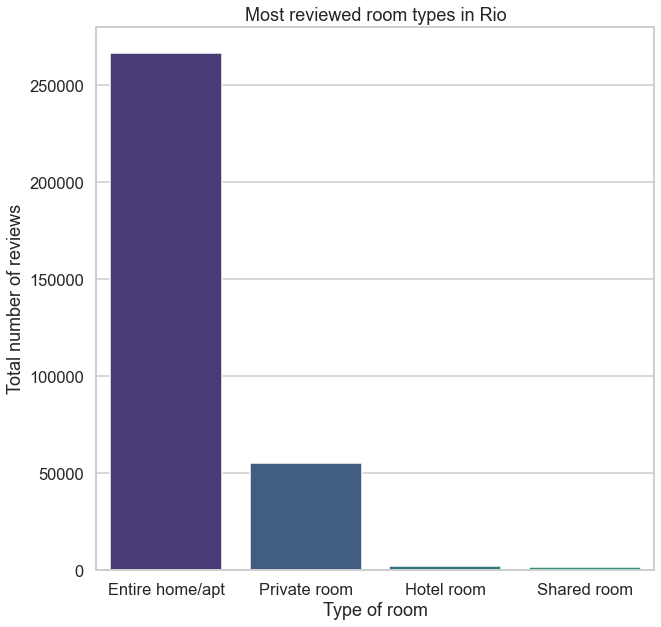

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=room_reviews_count.index, y=room_reviews_count.values, ax=ax)

# Customizing plot
ax.set_title('Most reviewed room types in Rio')
ax.set_ylabel('Total number of reviews')
ax.set_xlabel('Type of room')
plt.show()

We see rooms belonging to the category of entire apartments have been reviewed the most, which indicates they indeed are a popular option.

### What is the most expensive room type?

We can organize this data to find the average price per room type

In [42]:
room_per_price_mean = group_columns(df, 'room_type', 'price', 'mean').sort_values(ascending=False)
print(room_per_price_mean)

room_type
Shared room        1444.200000
Entire home/apt     832.298911
Hotel room          455.562500
Private room        449.204614
Name: price, dtype: float64


This is interesting! It seems that visitors pay, on average, more for a *shared room* than for an *entire home/apt*, which is unexpected. However, I suspect there might be outliers. Let us visualize this data in a boxplot.

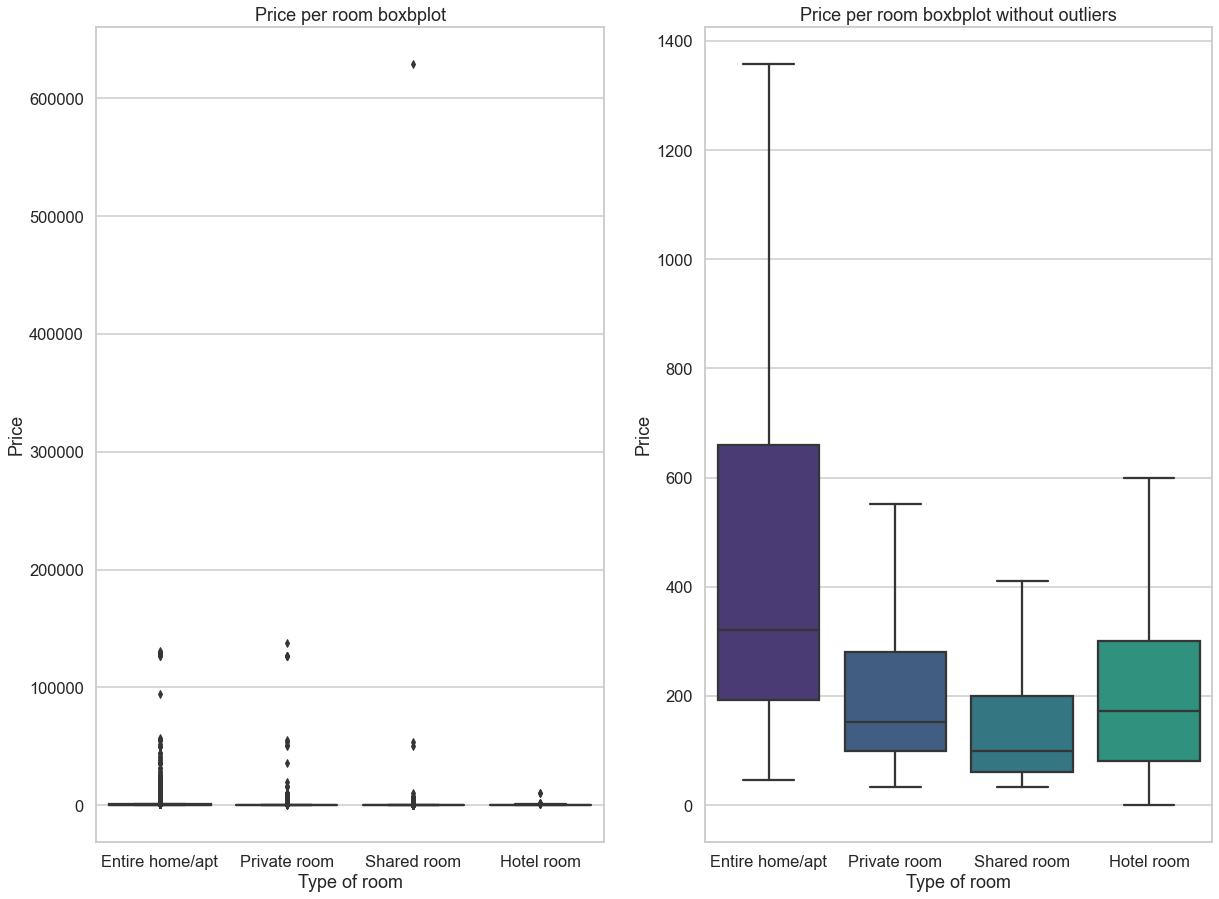

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))
sns.boxplot(x=df['room_type'], y=df['price'], ax=ax1)
sns.boxplot(x=df['room_type'], y=df['price'], ax=ax2, showfliers=False)

# Customizing plot
ax1.set_title('Price per room boxbplot')
ax1.set_ylabel('Price')
ax1.set_xlabel('Type of room')

ax2.set_title('Price per room boxbplot without outliers')
ax2.set_ylabel('Price')
ax2.set_xlabel('Type of room')
plt.show()

As we can see, there is indeed a big outlier that increased the mean of the *shared rooms* up (graph on the left). If we remove the outliers, we notice that *entire home/apts* have minimums close to the maximums of the other types of room. To look at the exact numbers, we can look at the table below

In [43]:
room_per_price_median = group_columns(df, 'room_type', 'price', 'median').sort_values(ascending=False)
print(room_per_price_median)

room_type
Entire home/apt    320
Hotel room         173
Private room       153
Shared room        100
Name: price, dtype: int64


Therefore, when visiting Rio de Janeiro, we can expect to pay a little more for *entire home/apts*

### The most expensive rooms are located in which neighborhood?

In [44]:
neighborhood_mean = group_columns(df, 'neighbourhood', 'price', 'mean').sort_values(ascending=False)
print(neighborhood_mean)

neighbourhood
São Cristóvão     7851.309524
Joá               3926.829268
Bangu             3240.578947
São Conrado       2483.074890
Anchieta          1951.666667
                     ...     
Penha Circular      97.222222
Jardim Carioca      92.800000
Coelho Neto         92.500000
Galeão              75.500000
Vila Kosmos         39.000000
Name: price, Length: 151, dtype: float64


We observe São Cristóvão is an expensive neighborhood to rent a room

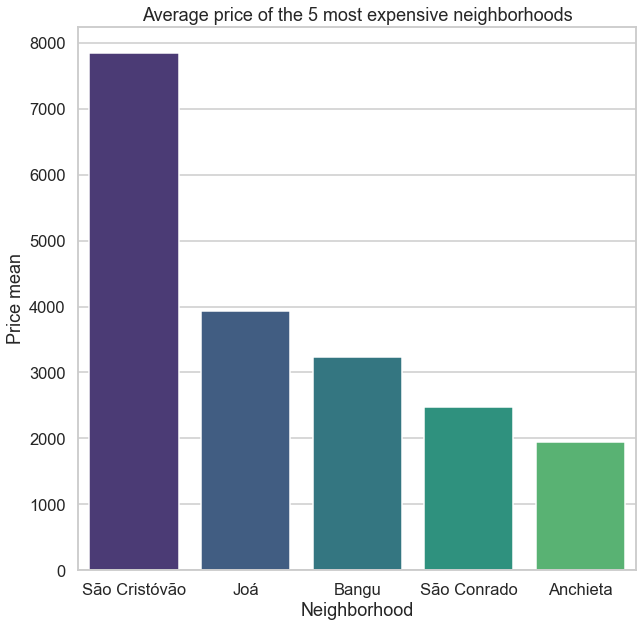

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=neighborhood_mean[:5].index, y=neighborhood_mean[:5].values, ax=ax)

# Customizing plot
ax.set_title('Average price of the 5 most expensive neighborhoods')
ax.set_ylabel('Price mean')
ax.set_xlabel('Neighborhood')
plt.show()

As before, the outlier might be affecting the average price mean for each neighborhood. Let us organize the data according to the median

In [45]:
neighborhood_median = group_columns(df, 'neighbourhood', 'price', 'median').sort_values(ascending=False)
print(neighborhood_median)

neighbourhood
Joá               2277.5
Vista Alegre      1309.0
Realengo          1000.0
Cavalcanti         925.0
Osvaldo Cruz       900.0
                   ...  
Ramos               70.0
Senador Camará      67.0
Bonsucesso          60.0
Penha Circular      60.0
Vila Kosmos         39.0
Name: price, Length: 151, dtype: float64


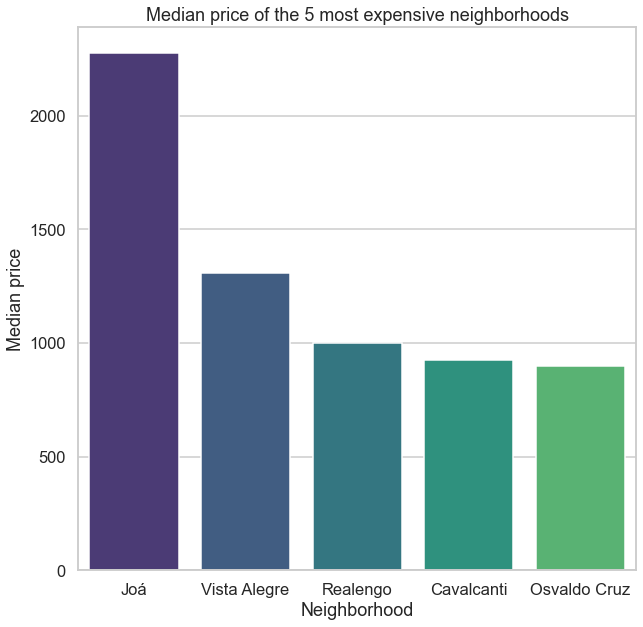

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=neighborhood_median[:5].index, y=neighborhood_median[:5].values, ax=ax)

# Customizing plot
ax.set_title('Median price of the 5 most expensive neighborhoods')
ax.set_ylabel('Median price')
ax.set_xlabel('Neighborhood')
plt.show()

Notice prices in Joá appear on the top five neighborhoods in both graphs, which shows it indeed has higher prices according to both mean and median. 

### What is the expected average price per neighborhood?

We will visualize the average price per neighborhood on the map

In [40]:
import folium
import json

# Saving Rio's coordinates
rio_lat = -22.908333
rio_lng = -43.196388

# Creating Rio de Janeiro map
rio_map = folium.Map(location=[rio_lat, rio_lng], zoom_start=12)

Airbnb gives us a geojson file of all neighborhoods in Rio

In [61]:
# Opening JSON file
f = open('neighbourhoods.geojson', encoding="utf8")
  
# Loading the JSON file 
data = json.load(f)

# Adding neighborhood data to the map
folium.GeoJson(data, name="geojson").add_to(rio_map)

We can place the markers showing the mean price per neighborhood. In our previous answer, we collected the mean price per neighborhood, but we also need the coordinates of each neighborhood

In [46]:
neighborhood_mean_coordinates = group_columns(df, 'neighbourhood', ['latitude', 'longitude', 'price'], 'mean').sort_values(by='price', ascending=False)
print(neighborhood_mean_coordinates)

                 latitude  longitude        price
neighbourhood                                    
São Cristóvão  -22.899359 -43.222145  7851.309524
Joá            -23.011513 -43.290660  3926.829268
Bangu          -22.866443 -43.469699  3240.578947
São Conrado    -22.995351 -43.263606  2483.074890
Anchieta       -22.824167 -43.400817  1951.666667
...                   ...        ...          ...
Penha Circular -22.837622 -43.294336    97.222222
Jardim Carioca -22.807942 -43.194858    92.800000
Coelho Neto    -22.827572 -43.350645    92.500000
Galeão         -22.818475 -43.224720    75.500000
Vila Kosmos    -22.852030 -43.310920    39.000000

[151 rows x 3 columns]


In [114]:
for index, row in neighborhood_mean_coordinates.iterrows():
    folium.Marker(
    location=[row['latitude'], row['longitude']],
    popup='Neighborhood: {neighborhood} <br>Price: {price}</br>'.format(neighborhood=row['neighbourhood'], price=row['price']),
    icon=folium.Icon(color="red"), ).add_to(rio_map)

In [115]:
rio_map

## Summary

- What is the most popular neighborhood for renting a room?: **Ipanema**
- What is the most expensive room type?: **entire home/apts**
- What is the most popular room type? **entire home/apts**
- What is the most expensive neighborhood to rent a room? **Joá** is the most expensive neighborhood in Rio. We would expect to pay, on average, 3926.83 per room. Half of the rooms are above the 2277.5 price line; half are below.